In [1]:
import pandas as pd

df = pd.read_csv("user_data.csv")
df = df.drop(["First Name" , "Last Name" , "City" , "State", "Country" , "Education Level"] , axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475688 entries, 0 to 475687
Data columns (total 25 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Gender                                     475688 non-null  object 
 1   Age                                        475688 non-null  int64  
 2   Annual Vacation Days                       475688 non-null  float64
 3   Average Monthly Spend on Entertainment     475688 non-null  float64
 4   Number of Online Purchases in Last Month   475688 non-null  float64
 5   Number of Charity Donations in Last Year   475688 non-null  float64
 6   Average Weekly Exercise Hours              475688 non-null  float64
 7   Investment Portfolio Value                 475688 non-null  float64
 8   Health Consciousness Rating                475688 non-null  float64
 9   Average Daily Screen Time                  475688 non-null  float64
 10  Environm

In [2]:
df

,Gender,Age,Annual Vacation Days,Average Monthly Spend on Entertainment,Number of Online Purchases in Last Month,Number of Charity Donations in Last Year,Average Weekly Exercise Hours,Investment Portfolio Value,Health Consciousness Rating,Average Daily Screen Time,...,Financial Wellness Index,Lifestyle Balance Score,Entertainment Engagement Factor,Social Responsibility Index,Work-Life Balance Indicator,Investment Risk Appetite,Eco-Consciousness Metric,Stress Management Score,Time Management Skill,Lifestyle Choice
0,male,49,30.02,0.00,166.0,3.0,0.00,295.63,0.68,5.86,...,100.00,36.49,2.26,0.0,0.49,0.45,0.0,4.93,44.37,Eco-Friendly
1,male,43,23.64,7.23,130.0,0.0,2.80,0.00,0.64,3.52,...,100.00,25.72,0.89,0.0,0.54,3.66,0.0,0.78,1.09,Adventure Seeker
2,female,37,7.91,8.09,107.0,0.0,0.00,0.00,0.75,6.74,...,70.42,7.14,1.27,0.0,0.00,7.09,0.0,1.16,33.64,Urban Professional
3,male,22,20.63,6.39,138.0,0.0,0.00,0.00,0.57,5.38,...,103.17,27.14,1.79,0.0,0.00,1.61,0.0,3.06,100.00,Budget-Conscious
4,male,38,19.47,7.80,115.0,0.0,0.07,11.50,5.35,6.00,...,100.00,23.31,1.42,0.0,0.27,1.47,0.0,4.07,0.00,Health-Conscious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475683,male,34,0.88,43.53,100.0,0.0,0.24,11.12,0.00,3.71,...,100.00,0.98,2.20,0.0,0.77,0.73,0.0,2.90,1.11,Fitness Enthusiast
475684,female,24,8.04,42.33,78.0,0.0,0.00,10.16,0.71,1.67,...,100.00,1.03,2.84,0.0,0.00,6.41,0.0,5.98,7.12,Digital Nomad
475685,female,30,21.44,24.24,189.0,0.0,0.00,0.00,0.88,1.59,...,100.00,14.94,1.07,0.0,0.00,0.01,0.0,0.84,3.62,Travel Enthusiast
475686,female,62,27.87,45.78,115.0,0.0,0.00,1.61,0.77,7.35,...,0.00,32.25,2.08,0.0,0.32,2.04,0.0,4.27,6.10,Investor


In [3]:
labels = df["Lifestyle Choice"].unique()

lifestyle_encoded = dict()

count = 1
for label in labels:
  lifestyle_encoded[label] = count
  count += 1
  
lifestyle_encoded

{'Eco-Friendly': 1,
 'Adventure Seeker': 2,
 'Urban Professional': 3,
 'Budget-Conscious': 4,
 'Health-Conscious': 5,
 'Tech-Savvy': 6,
 'Social Media Influencer': 7,
 'Sustainable Investor': 8,
 'Digital Nomad': 9,
 'Travel Enthusiast': 10,
 'Fitness Enthusiast': 11,
 'Investor': 12}

In [4]:
genders = {"male" : 1 , "female" : 2}
df["Gender"] = df["Gender"].replace(genders)
df["Lifestyle Choice"] = df["Lifestyle Choice"].replace(lifestyle_encoded)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475688 entries, 0 to 475687
Data columns (total 25 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Gender                                     475688 non-null  int64  
 1   Age                                        475688 non-null  int64  
 2   Annual Vacation Days                       475688 non-null  float64
 3   Average Monthly Spend on Entertainment     475688 non-null  float64
 4   Number of Online Purchases in Last Month   475688 non-null  float64
 5   Number of Charity Donations in Last Year   475688 non-null  float64
 6   Average Weekly Exercise Hours              475688 non-null  float64
 7   Investment Portfolio Value                 475688 non-null  float64
 8   Health Consciousness Rating                475688 non-null  float64
 9   Average Daily Screen Time                  475688 non-null  float64
 10  Environm

In [5]:
# โหลดข้อมูล
X = df.drop(["Lifestyle Choice"],axis=1)
y = df["Lifestyle Choice"]

In [6]:
from sklearn.model_selection import train_test_split

X_train , X_temp , y_train , y_temp = train_test_split(X,y, test_size=0.3, random_state=24)
X_val , X_test , y_val , y_test = train_test_split(X_temp , y_temp , test_size=0.3,random_state=24)

In [7]:
X_train.shape[0],X_val.shape[0] , X_test.shape[0]

(332981, 99894, 42813)

## LinearSVC Classifier

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(
    StandardScaler(),
    LinearSVC(dual="auto", random_state=24, tol=1e-5)
)
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual='auto', random_state=24, tol=1e-05))])

### Find Best Hyperparameters

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_distributions = {
    "linearsvc__C": [0.1, 1, 10, 100],
    "linearsvc__penalty": ["l1", "l2"],
    "linearsvc__loss" : ["hinge" , "squared_hinge"],
    "linearsvc__max_iter" : [10,50,100,500,1000]
}

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distributions,
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
model = random_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

val_predictions = random_search.predict(X_test)
val_accuracy = accuracy_score(y_test, val_predictions)
print(f"Validation Accuracy with Best Hyperparameters: {val_accuracy}")

print('Train accuracy' , model.score(X_train,y_train))
print('Test accuracy' ,model.score(X_test,y_test))


"""
Best Hyperparameters: {'linearsvc__penalty': 'l1', 'linearsvc__max_iter': 1000, 'linearsvc__loss': 'squared_hinge', 'linearsvc__C': 0.1}
Validation Accuracy with Best Hyperparameters: 0.9272183682526336
Train accuracy 0.9277075869193738
Test accuracy 0.9272183682526336
"""

/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to co

Best Hyperparameters: {'linearsvc__penalty': 'l1', 'linearsvc__max_iter': 1000, 'linearsvc__loss': 'squared_hinge', 'linearsvc__C': 0.1}
Validation Accuracy with Best Hyperparameters: 0.9273351552098662
Train accuracy 0.9277886726269667
Test accuracy 0.9273351552098662


/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


"\nBest Hyperparameters: {'linearsvc__penalty': 'l1', 'linearsvc__max_iter': 1000, 'linearsvc__loss': 'squared_hinge', 'linearsvc__C': 0.1}\nValidation Accuracy with Best Hyperparameters: 0.9272183682526336\nTrain accuracy 0.9277075869193738\nTest accuracy 0.9272183682526336\n"

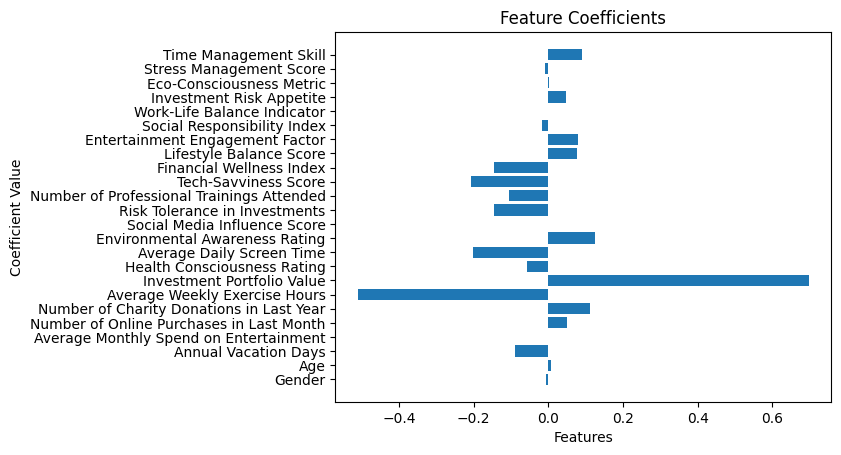

In [10]:
import matplotlib.pyplot as plt
# Access the LinearSVC instance from the pipeline
linear_svc_model = model.named_steps["linearsvc"]
coefficients = linear_svc_model.coef_[0]
coefficients

plt.barh(X.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()

In [11]:
# import matplotlib.pyplot as plt
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import LinearSVC
# from sklearn.preprocessing import StandardScaler
# #{'linearsvc__penalty': 'l1', 'linearsvc__max_iter': 1000, 'linearsvc__loss': 'squared_hinge', 'linearsvc__C': 0.1}
# # Access the LinearSVC instance from the pipeline
# clf = make_pipeline(
#     StandardScaler(),
#     LinearSVC(C=0.1,loss="squared_hinge", max_iter=1000 , penalty='l1',dual="auto")
# )

# clf.fit(X_train, y_train)
# linear_svc_model = clf.named_steps["linearsvc"]
# coefficients = linear_svc_model.coef_[0]
# coefficients

# plt.barh(X.columns, coefficients)
# plt.xlabel('Features')
# plt.ylabel('Coefficient Value')
# plt.title('Feature Coefficients')
# plt.show()

In [12]:
index = 0
columns = df.columns
features = []
for coefficient in coefficients :
  if coefficient > 0 :
    features.append(columns[index])
  index += 1
features

['Age',
 'Average Monthly Spend on Entertainment',
 'Number of Online Purchases in Last Month',
 'Number of Charity Donations in Last Year',
 'Investment Portfolio Value',
 'Environmental Awareness Rating',
 'Lifestyle Balance Score',
 'Entertainment Engagement Factor',
 'Investment Risk Appetite',
 'Eco-Consciousness Metric',
 'Time Management Skill']

In [13]:
from sklearn.feature_selection import SelectFromModel

X_train_new = X_train[features]
X_test_new = X_test[features]

original_model = random_search.best_estimator_
new_model = original_model.fit(X_train_new,y_train)

print('Train accuracy' , new_model.score(X_train_new,y_train))
print('Test accuracy' ,new_model.score(X_test_new,y_test))

Train accuracy 0.5771740729951559
Test accuracy 0.575129049587742


/Users/imdev/SornchaiTheDev/lifestyle-prediction/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
from sklearn.feature_selection import SelectFromModel

X_train_new = X_train[features]
X_test_new = X_test[features]


new_model = clf.fit(X_train_new,y_train)

print('Train accuracy' , new_model.score(X_train_new,y_train))
print('Test accuracy' ,new_model.score(X_test_new,y_test))

Train accuracy 0.6063979626465174
Test accuracy 0.6028542732347651


### Report

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_new)

print("Confusion Matrix :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Classification Report")
report = classification_report(y_test, y_pred)
print(report)

Confusion Matrix :
[[3400    0    6    0    9    0    0   53   13    0    0    0]
 [  13  158   92  519   26   40   67    5 2617   66   27   39]
 [  30    6 1522 1598   16   22   78    1   37  185   24   37]
 [   0    0    0 3342   16    0    0    4   45  145    0    0]
 [   0   15  198   23 2984   53  141   24    1   29   65    4]
 [   0    1 1449  131   54  406  913    0   39  100  432   67]
 [   0    2  448   58   46  123 1529    0   40 1264  112   10]
 [   0    7    0    1   66    0    0 3280  159    8    1    8]
 [   2   42    5    3   46    2    5    4 3477   10    1    0]
 [   0    0   24  266   20    7  374    9   42 2801    5   35]
 [   1    1 1467  143   56  385  936    1   47   96  392   65]
 [   0    0    2 1312   48   10    4   10   39  719   18 1332]]
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.98      0.98      3481
           2       0.68      0.04      0.08      3669
           3       0.29      0.43      

## Baselines

#### Random Baseline

In [16]:
from sklearn.metrics import accuracy_score
import numpy as np

random_prediction = np.random.randint(0,11,size=len(y_test))

accuracy = accuracy_score(y_test,random_prediction)
print("Accuracy :",accuracy)

Accuracy : 0.0759348795926471


#### Zero Rule

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

zero_rule_baseline = DummyClassifier(strategy='most_frequent')
zero_rule_baseline.fit(X_train, y_train)

zero_rule_predictions = zero_rule_baseline.predict(X_test)

zero_rule_accuracy = accuracy_score(y_test, zero_rule_predictions)
print("Accuracy :", zero_rule_accuracy)

Accuracy : 0.08296545441805059


In [18]:
import joblib

joblib.dump(new_model , "model.joblib")
joblib.dump(lifestyle_encoded , "labels.joblib")

['labels.joblib']

In [19]:
import pandas as pd

# Assuming df is your DataFrame
# Create a sample DataFrame for demonstration
data = df[['Age',
 'Average Monthly Spend on Entertainment',
 'Number of Online Purchases in Last Month',
 'Number of Charity Donations in Last Year',
 'Investment Portfolio Value',
 'Environmental Awareness Rating',
 'Lifestyle Balance Score',
 'Entertainment Engagement Factor',
 'Investment Risk Appetite',
 'Eco-Consciousness Metric',
 'Time Management Skill']]

data = pd.DataFrame(data)

# Find min and max values in each feature
min_values = data.apply(min)
max_values = data.apply(max)

print("Feature\tMinimum\tMaximum")
for feature, min_val, max_val in zip(data.columns, min_values, max_values):
    print(f"{feature}\t{min_val}\t{max_val}")


Feature	Minimum	Maximum
Age	19.0	100.0
Average Monthly Spend on Entertainment	0.0	369.23
Number of Online Purchases in Last Month	20.0	302.0
Number of Charity Donations in Last Year	0.0	12.0
Investment Portfolio Value	0.0	1409.37
Environmental Awareness Rating	0.0	58.86
Lifestyle Balance Score	0.0	71.31
Entertainment Engagement Factor	0.0	4.37
Investment Risk Appetite	0.0	12.3
Eco-Consciousness Metric	0.0	4.2
Time Management Skill	0.0	100.0


In [22]:
%%writefile app.py
# !pip install gradio ipywidgets
import pandas as pd
import gradio as gr
import joblib

# "Artifacts"
model = joblib.load("model.joblib")
labels = joblib.load("labels.joblib")

def decodeLifeStyle(encodedValue) :
    lifestyle_encoded = {'Eco-Friendly': 1,
 'Adventure Seeker': 2,
 'Urban Professional': 3,
 'Budget-Conscious': 4,
 'Health-Conscious': 5,
 'Tech-Savvy': 6,
 'Social Media Influencer': 7,
 'Sustainable Investor': 8,
 'Digital Nomad': 9,
 'Travel Enthusiast': 10,
 'Fitness Enthusiast': 11,
 'Investor': 12}
    
    for lifestyle, value in lifestyle_encoded.items() :
        if encodedValue == value:
            return lifestyle
    

def predict(age, avg_ent, online_purchases , charity_donations , invest_port , env_awar , lifestyle_balance , ent_eng, invest_risk , eco_cons , time_man):
    sample = dict()

    sample['Age'] = age
    sample['Average Monthly Spend on Entertainment'] = avg_ent
    sample['Number of Online Purchases in Last Month'] = online_purchases
    sample['Number of Charity Donations in Last Year'] = charity_donations
    sample['Investment Portfolio Value'] = invest_port
    sample['Environmental Awareness Rating'] = env_awar
    sample['Lifestyle Balance Score'] = lifestyle_balance
    sample['Entertainment Engagement Factor'] = ent_eng
    sample['Investment Risk Appetite'] = invest_risk
    sample['Eco-Consciousness Metric'] = eco_cons
    sample['Time Management Skill'] = time_man
    

    lifestyle = model.predict(pd.DataFrame([sample]))
    
    return decodeLifeStyle(lifestyle[0])

# https://www.gradio.app/guides
with gr.Blocks() as blocks:
    age = gr.Slider(19,100, label = 'Age')
    avg_ent = gr.Slider(0,370 , label = 'Average Monthly Spend on Entertainment' , info = '(dollars)')
    online_purchases = gr.Slider(0, 300 , label = 'Number of Online Purchases in Last Month')
    charity_donations = gr.Slider(0, 20 , label = 'Number of Charity Donations in Last Year')
    invest_port = gr.Slider(0,1500, label = 'Investment Portfolio Value')
    env_awar = gr.Slider(0,60, label = 'Environmental Awarness Rating')
    lifestyle_balance = gr.Slider(0,100, label = 'Lifestyle Balance Score')
    ent_eng = gr.Slider(0,5 , label = 'Entertainment Engagement Factor' , step = 0.1)
    invest_risk = gr.Slider(0,20, label = 'Investment Risk Appetite' , step = 0.1)
    eco_cons = gr.Slider(0,5 , label = 'Eco-Consciousness Metric' , step = 0.1)
    time_man = gr.Slider(0, 150 , label = 'Time Management Skill')

    lifestyle = gr.Label(label = 'Lifestyle')

    inputs = [age, avg_ent, online_purchases , charity_donations , invest_port , env_awar , lifestyle_balance , ent_eng, invest_risk , eco_cons , time_man]
    outputs = [lifestyle]

    predict_btn = gr.Button("Predict")
    predict_btn.click(predict, inputs=inputs, outputs=outputs)

if __name__ == "__main__":
    blocks.launch() # Local machine only
    # blocks.launch(server_name="0.0.0.0") # LAN access to local machine
    # blocks.launch(share=True) # Public access to local machine

Overwriting app.py
